# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url =  f"{url}q={city}&appid=311de801f609b990477c71c000db24bf&units=imperial"
    #print(city_url)

# Print the URL for logging
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

# Log the url, record, and set numbers
print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


# Run an API request for each of the cities
try:
    # Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()

    
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    city_lat = city_weather.json()["coord"]["lat"]
    city_lng = city_weather.json()["coord"]["lon"]
    city_max_temp = city_weather.json()["main"]["temp_max"]
    city_humidity = city_weather.json()["main"]["humidity"]
    city_clouds = city_weather.json()["clouds"]["all"]
    city_wind = city_weather.json()["wind"]["speed"]
    city_country = city_weather.json()["sys"]["country"]
    city_date = city_weather.json()["dt"]

    # Append the City information into city_data list
    city_data.append({
        "City": city, 
        "Lat": city_lat, 
        "Lng": city_lng, 
        "Max Temp": city_max_temp,
        "Humidity": city_humidity,
        "Cloudiness": city_clouds,
        "Wind Speed": city_wind,
        "Country": city_country,
        "Date": city_date
    })

# Add 1 to the record count
    record_count += 1

# If an error is experienced, skip the city
except:
    print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chikwawa
Processing Record 1 of Set 1 | fort st. john
Processing Record 1 of Set 1 | mukalla
Processing Record 1 of Set 1 | ilulissat
Processing Record 1 of Set 1 | grytviken
Processing Record 1 of Set 1 | val-d'or
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 1 of Set 1 | villa gesell
Processing Record 1 of Set 1 | nar'yan-mar
Processing Record 1 of Set 1 | chingirlau
Processing Record 1 of Set 1 | puerto natales
Processing Record 1 of Set 1 | blackmans bay
Processing Record 1 of Set 1 | flin flon
Processing Record 1 of Set 1 | ingeniero guillermo n. juarez
Processing Record 1 of Set 1 | longyearbyen
Processing Record 1 of Set 1 | bikenibeu village
Processing Record 1 of Set 1 | essaouira
Processing Record 1 of Set 1 | hermanus
Processing Record 1 of Set 1 | codrington
Processing Record 1 of Set 1 | avarua
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [30]:
# Display sample data
city_data_df.head()

""


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/chris/OneDrive/Documents/GitHub/python-api-challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

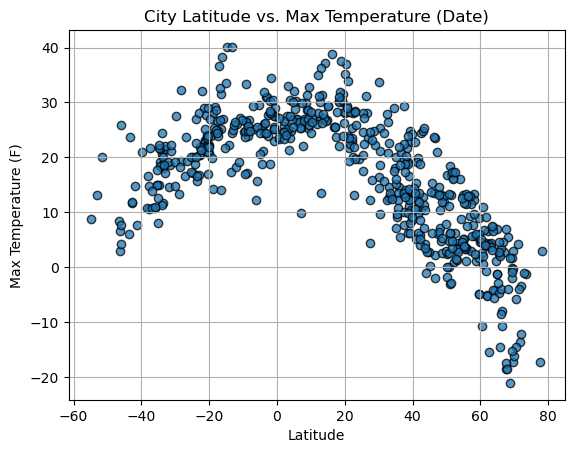

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/chris/OneDrive/Documents/GitHub/python-api-challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

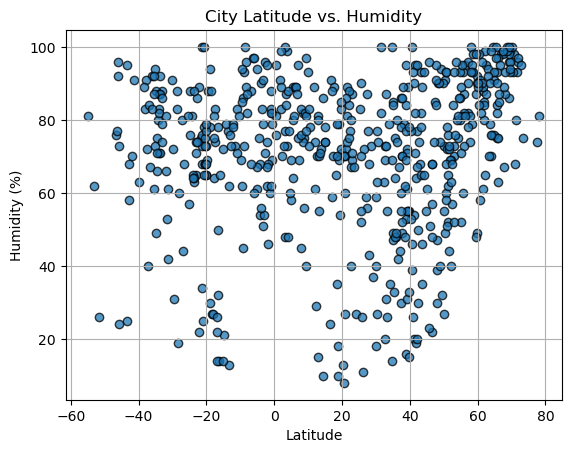

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/chris/OneDrive/Documents/GitHub/python-api-challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

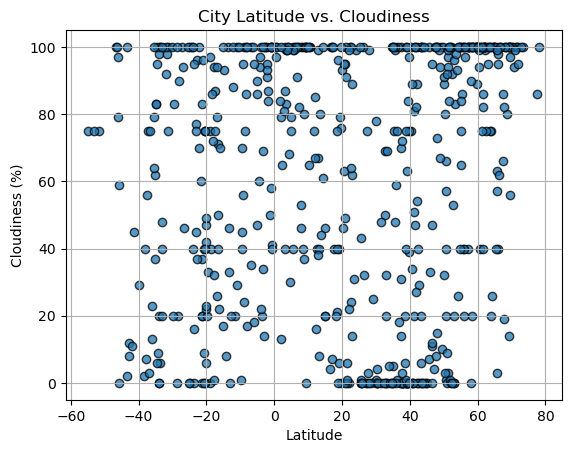

In [41]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/chris/OneDrive/Documents/GitHub/python-api-challenge/WeatherPy/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

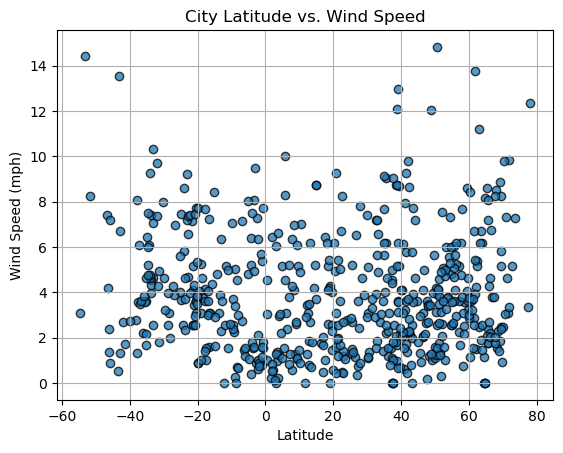

In [42]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/chris/OneDrive/Documents/GitHub/python-api-challenge/WeatherPy/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
import seaborn as sns
def plot_linear_regression(x, y, title, xlabel, ylabel):

    # Define a function to create Linear Regression plots
    sns.regplot(x=x, y=y, scatter_kws={'s': 10, 'color': 'blue'}, line_kws={'color': 'red'})

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
df_northern_hemisphere = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
df_northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
df_southern_hemisphere = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
df_southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

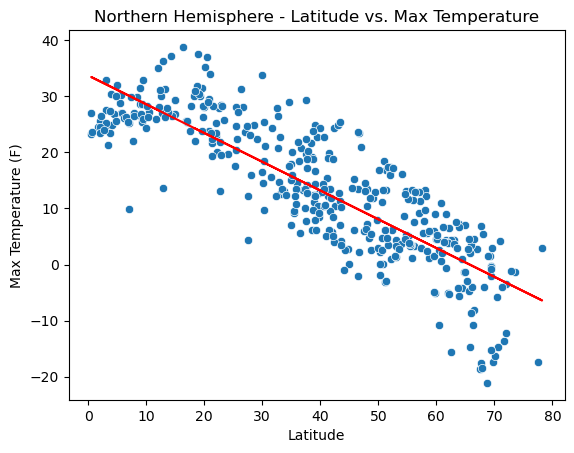

In [52]:
# Linear regression on Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(df_northern_hemisphere["Lat"], df_northern_hemisphere["Max Temp"])

# Create scatter plot
sns.scatterplot(x="Lat", y="Max Temp", data=df_northern_hemisphere)

# Calculate regression line
regression_line = slope * df_northern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_northern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Show plot
plt.show()

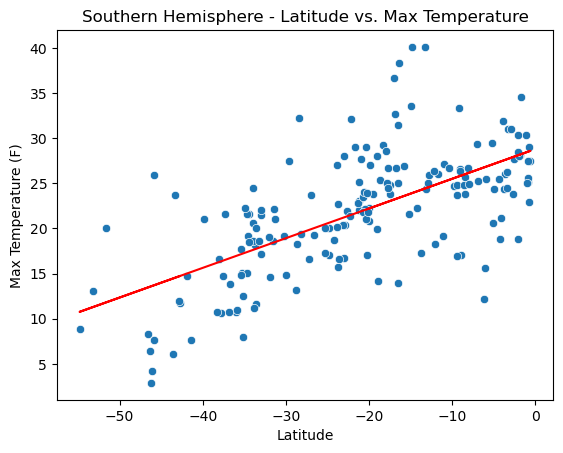

In [51]:
# Linear regression on Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(df_southern_hemisphere["Lat"], df_southern_hemisphere["Max Temp"])

# Create scatter plot
sns.scatterplot(x="Lat", y="Max Temp", data=df_southern_hemisphere)

# Calculate regression line
regression_line = slope * df_southern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_southern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Show plot
plt.show()

**Discussion about the linear relationship:** Tempature decreases as latitude increases and vice versa (tempature increases as latitude decreases)

### Humidity vs. Latitude Linear Regression Plot

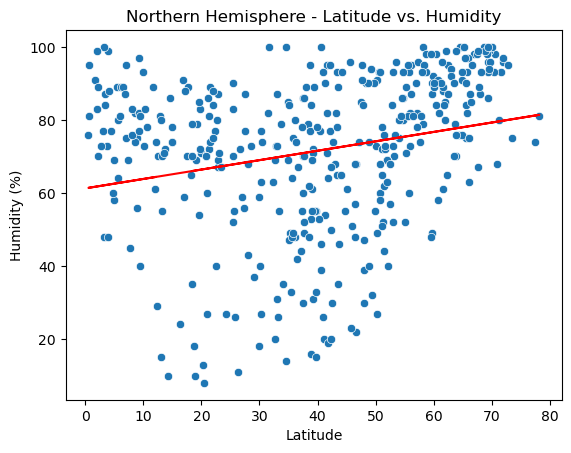

In [53]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(df_northern_hemisphere["Lat"], df_northern_hemisphere["Humidity"])

# Create scatter plot
sns.scatterplot(x="Lat", y="Humidity", data=df_northern_hemisphere)

# Calculate regression line
regression_line = slope * df_northern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_northern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show plot
plt.show()

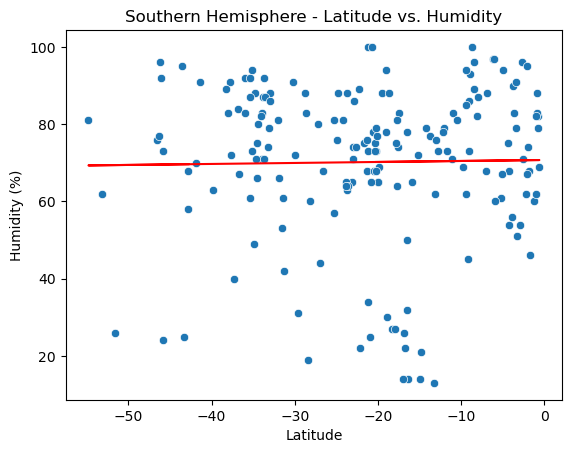

In [54]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(df_southern_hemisphere["Lat"], df_southern_hemisphere["Humidity"])

# Create scatter plot
sns.scatterplot(x="Lat", y="Humidity", data=df_southern_hemisphere)

# Calculate regression line
regression_line = slope * df_southern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_southern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show plot
plt.show()

**Discussion about the linear relationship:** Humidity increases slighly as latitude increases in the northern hemisphere. The effect is almost negligible in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness (%)')

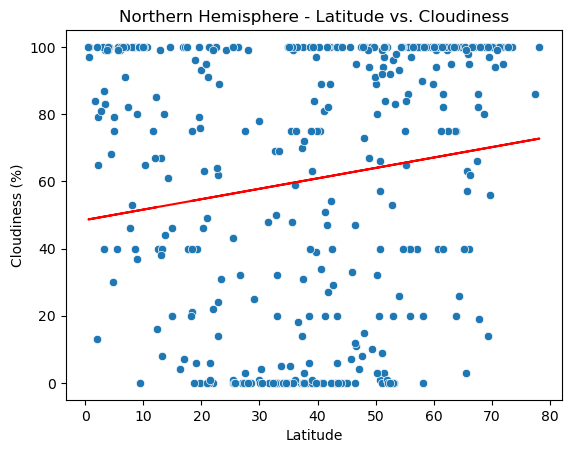

In [55]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(df_northern_hemisphere["Lat"], df_northern_hemisphere["Cloudiness"])

# Create scatter plot
sns.scatterplot(x="Lat", y="Cloudiness", data=df_northern_hemisphere)

# Calculate regression line
regression_line = slope * df_northern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_northern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

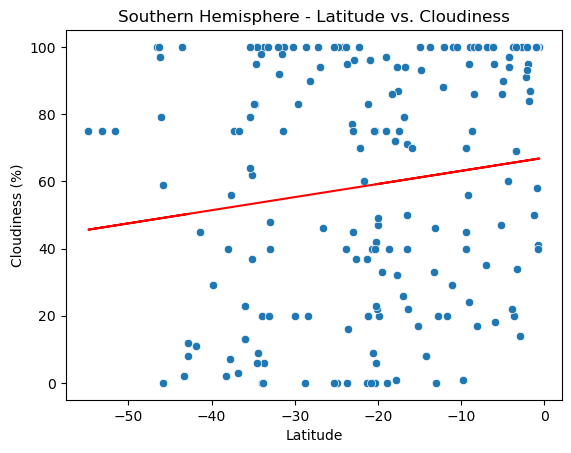

In [56]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(df_southern_hemisphere["Lat"], df_southern_hemisphere["Cloudiness"])

# Create scatter plot
sns.scatterplot(x="Lat", y="Cloudiness", data=df_southern_hemisphere)

# Calculate regression line
regression_line = slope * df_southern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_southern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show plot
plt.show()

**Discussion about the linear relationship:** Cloudiness increases as latitude increase for both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

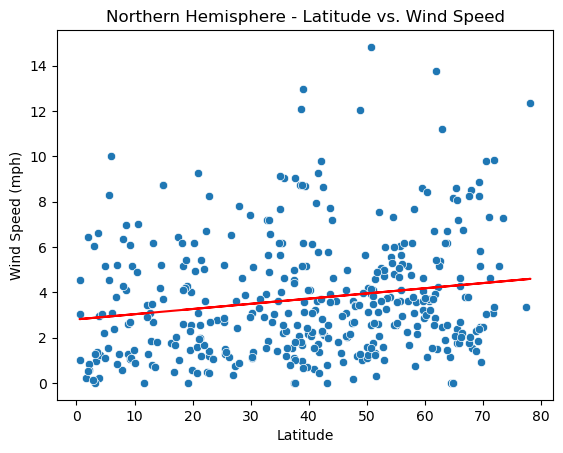

In [57]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(df_northern_hemisphere["Lat"], df_northern_hemisphere["Wind Speed"])

# Create scatter plot
sns.scatterplot(x="Lat", y="Wind Speed", data=df_northern_hemisphere)

# Calculate regression line
regression_line = slope * df_northern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_northern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show plot
plt.show()

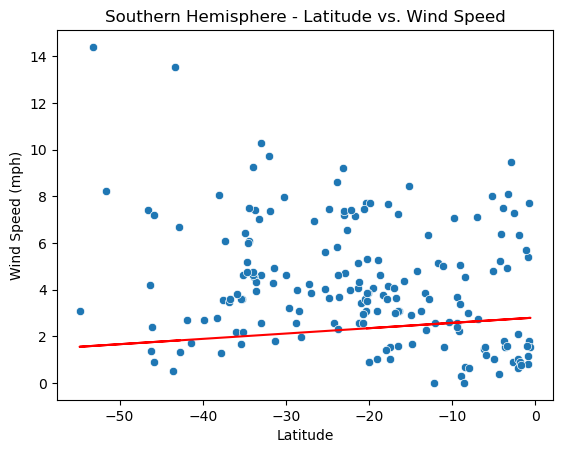

In [58]:
# Southern Hemisphere
sns.scatterplot(x="Lat", y="Wind Speed", data=df_southern_hemisphere)

# Calculate regression line
regression_line = slope * df_southern_hemisphere["Lat"] + intercept

# Plot regression line
plt.plot(df_southern_hemisphere["Lat"], regression_line, color='red')

# Add labels and title
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show plot
plt.show()

**Discussion about the linear relationship:** As latitude increases so does wind speed. Directionally the same for both hemispheres.